In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.patches as ptch
from matplotlib import gridspec

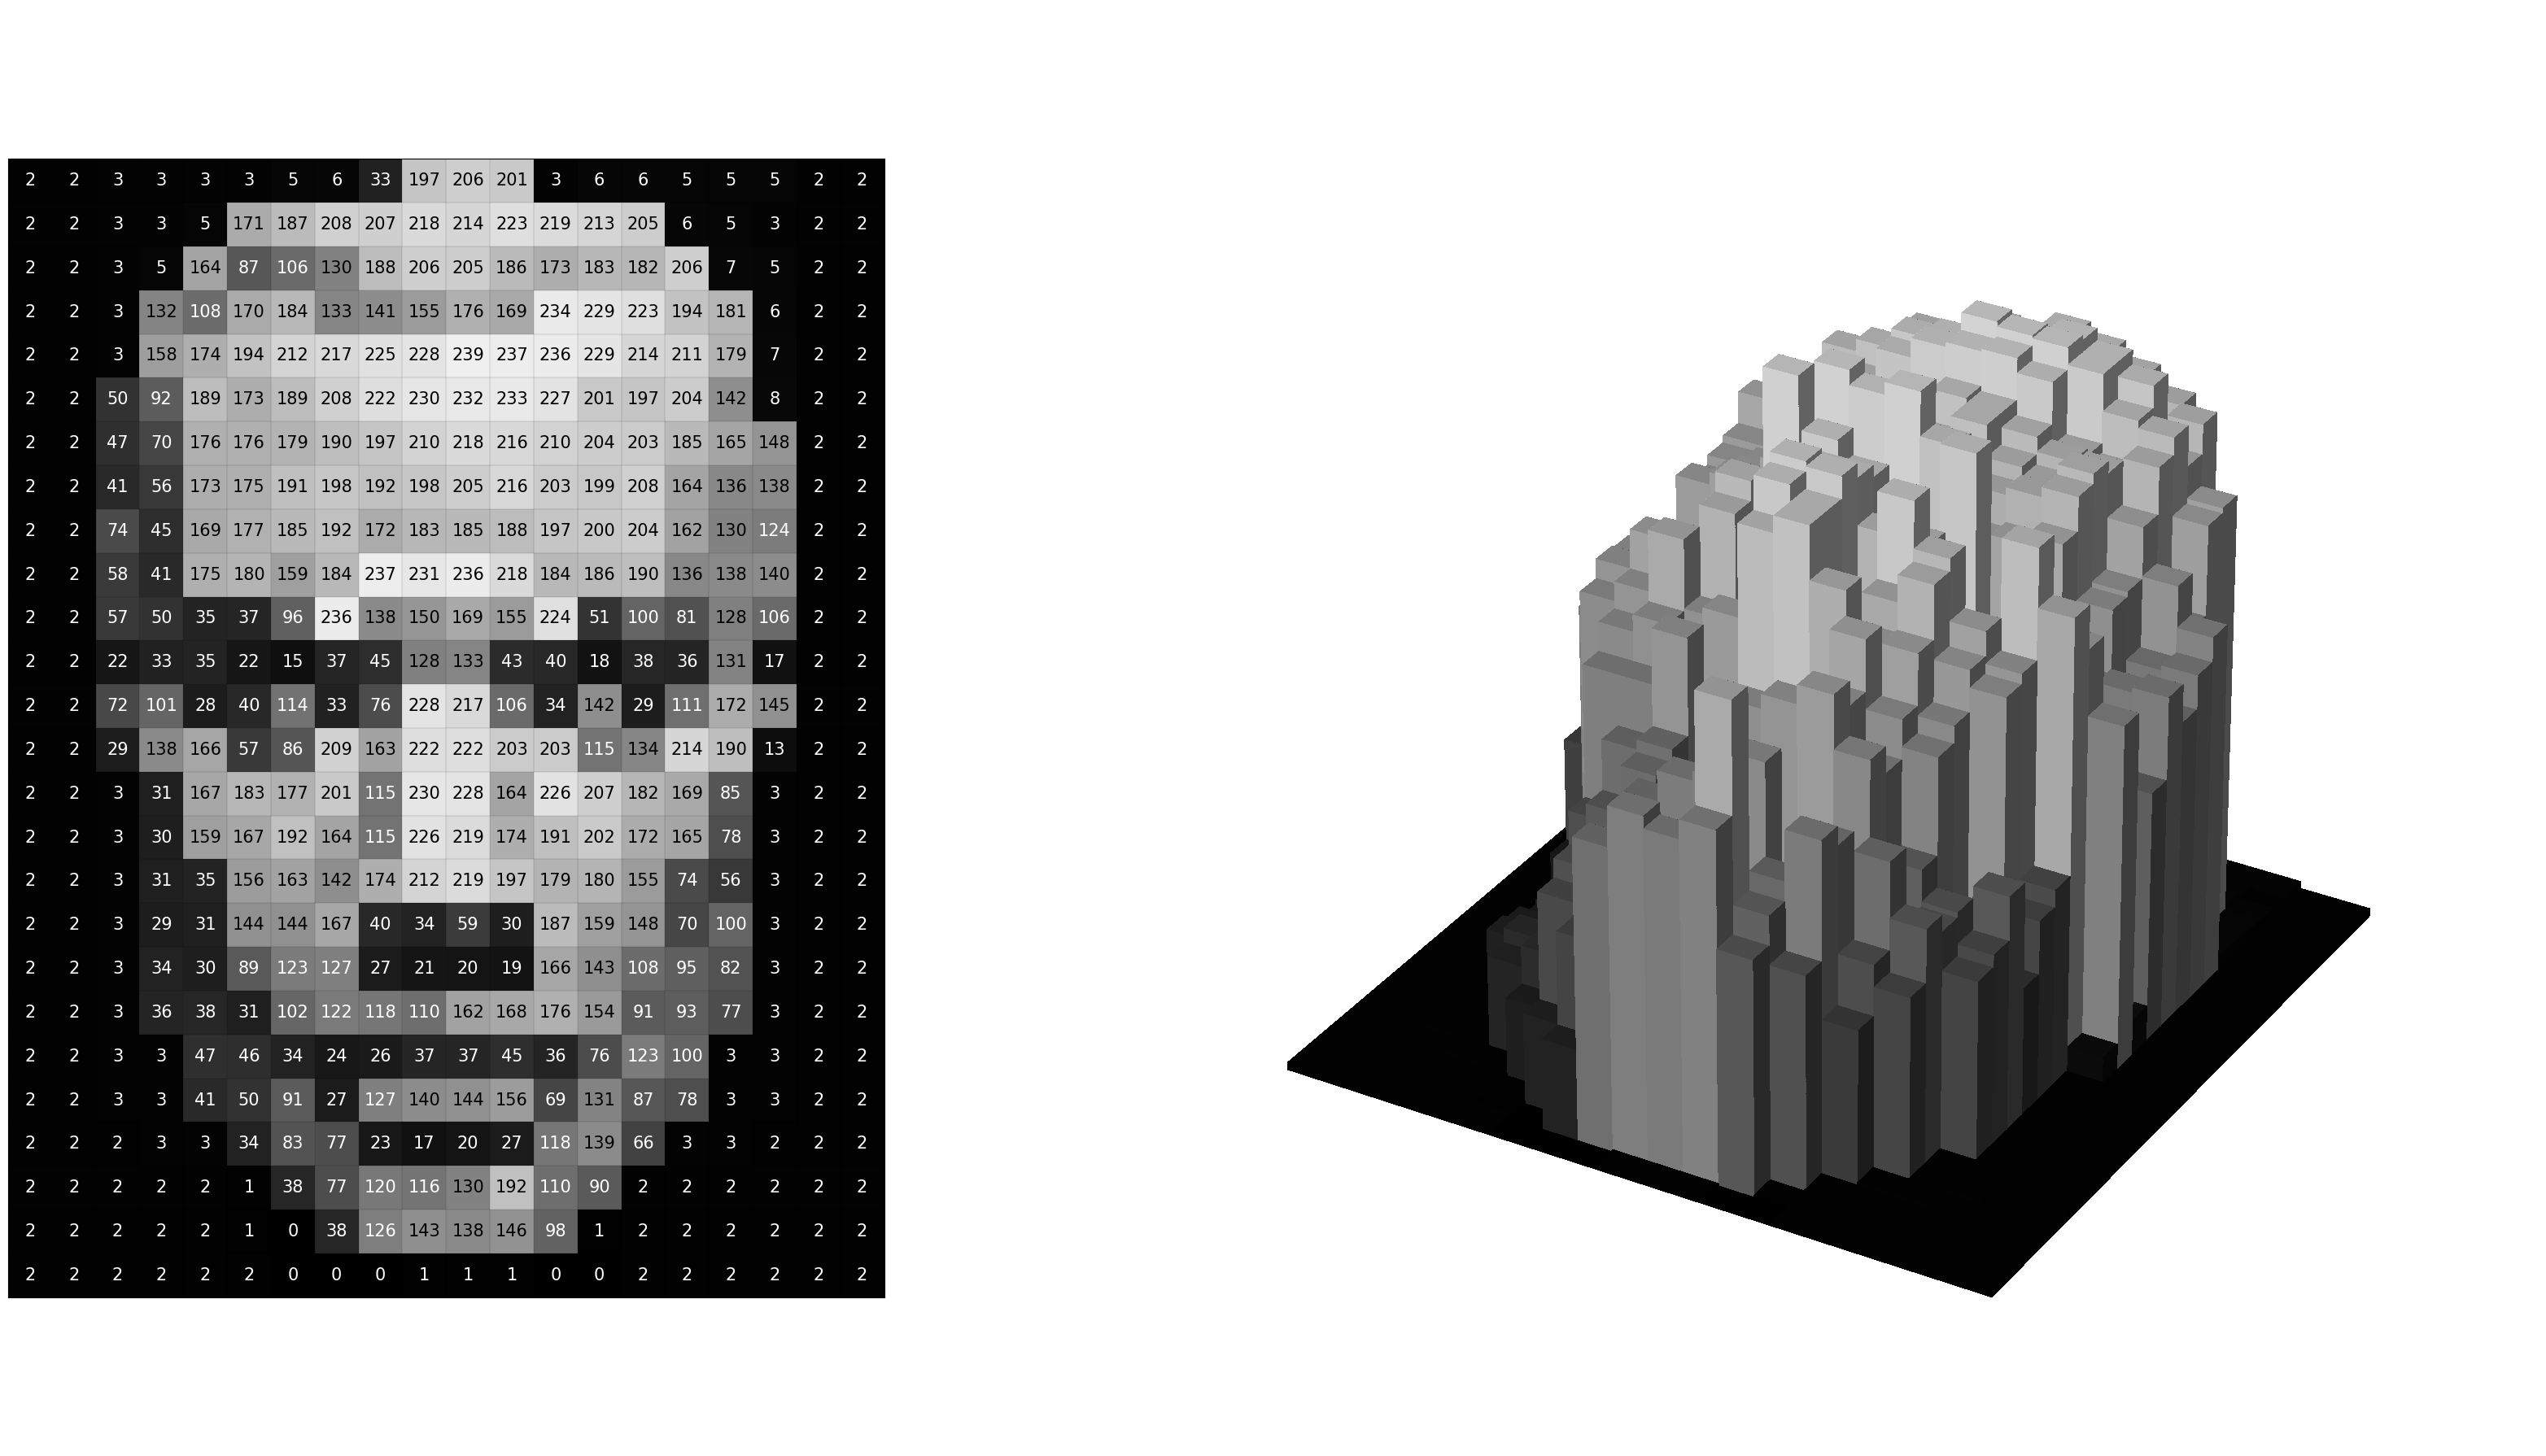

In [3]:
# obrazok - maticova vs mnozinova reprezentacia sedotonoveho obrazka
fig = plt.figure(figsize=(36,18))
gs = gridspec.GridSpec(1, 2, width_ratios=[1.2,3])

ax0 = fig.add_subplot(gs[0], aspect='equal')
ax0.set_xticks([])
ax0.set_yticks([])

sample_image = cv.imread("img/sample_image.png", cv.IMREAD_GRAYSCALE)
sample_image = cv.resize(sample_image, (20,26))
sample_image = cv.flip(sample_image, 0)
h,w = sample_image.shape
plt.setp(ax0, xlim=(0,w), ylim=(0,h))

for x_pos in range(w+1):
    ax0.axvline(x_pos, color="black", lw=0.2, alpha=0.5)
for y_pos in range(h+1):
    ax0.axhline(y_pos, color="black", lw=0.2, alpha=0.5)

for x in range(w):
    for y in range(h):
        ax0.add_patch(ptch.Rectangle([x,y],1,1, fc=[sample_image[y,x]/255]*3, ec=None))
        ax0.text(x+0.5, y+0.5, str(sample_image[y,x]), ha='center', va='center', fontsize=15,
                 color="white" if sample_image[y,x]<128 else "black")

ax1 = fig.add_subplot(gs[1], projection='3d')
filled_arr = np.zeros((w,h,256))
colors = np.zeros((w,h,256,3))
for x in range(w):
    for y in range(h):
        for z in range(256):
            filled_arr[x,y,z] = z <= sample_image[y,x]
            colors[x,y,z] = [sample_image[y,x]/255]*3
ax1.voxels(filled_arr, facecolors=colors, antialiased=False)
ax1.set_axis_off()
plt.tight_layout()
plt.show()

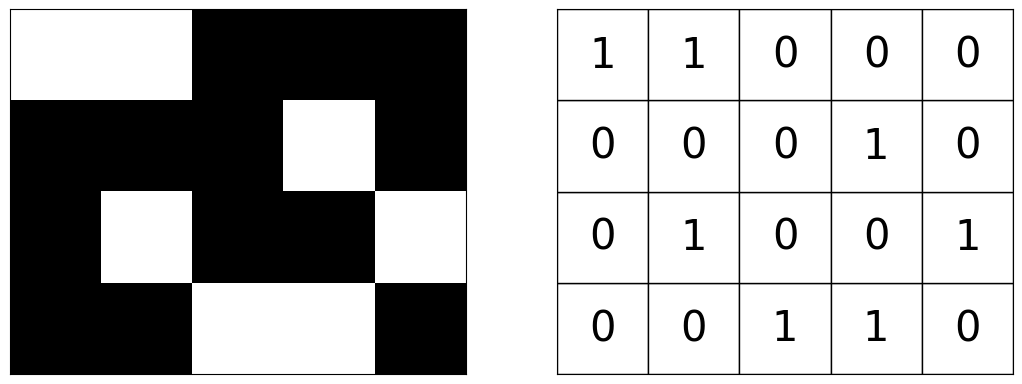

In [4]:
# obrazok - kodovanie binarneho obrazka
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(1, 3, width_ratios=[2,2,2])

ax0 = fig.add_subplot(gs[0], aspect='equal')

img = np.uint8([[0,0,1,1,0], [0,1,0,0,1], [0,0,0,1,0], [1,1,0,0,0]])
ax0.imshow(cv.flip(img, 0), cmap="gray")
ax0.set_xticks([])
ax0.set_yticks([])

ax1 = fig.add_subplot(gs[1], aspect='equal')
plt.setp(ax1, xlim=(0,5), ylim=(0,4), xticks=[], yticks=[])
for x in range(5):
    for y in range(4):
        ax1.add_patch(ptch.Rectangle([x,y],1,1, fc="w",ec="black"))
        ax1.text(x+0.5, y+0.5, str(img[y,x]), ha='center', va='center', fontsize=30)
plt.show()

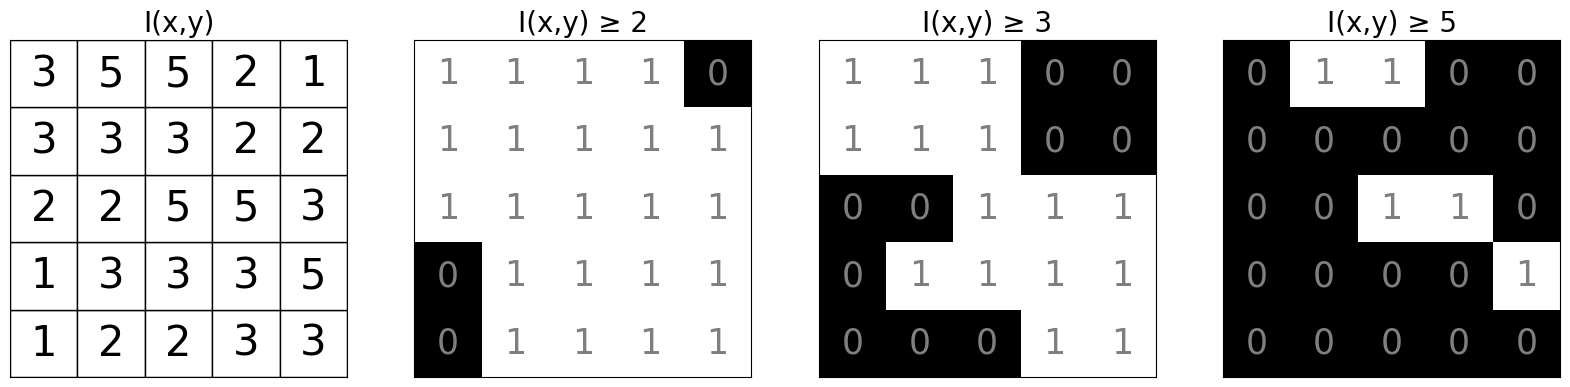

In [5]:
# v nasledujucich bunkach:
# obrazkove vystupy - priklad threhsoldingu na trivialnom obrazku
example = np.uint8([[1,2,2,3,3],
                    [1,3,3,3,5],
                    [2,2,5,5,3],
                    [3,3,3,2,2],
                    [3,5,5,2,1]])

t1 = example >= 2
t2 = example >= 3
t3 = example >= 5

fig = plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(1, 4, width_ratios=[2,2,2,2])

ax1 = fig.add_subplot(gs[0], aspect='equal')
plt.setp(ax1, xlim=(0,5), ylim=(0,5), xticks=[], yticks=[])
ax1.set_title("I(x,y)", fontsize=20)
for x in range(5):
    for y in range(5):
        ax1.add_patch(ptch.Rectangle([x,y],1,1, fc="w",ec="black"))
        ax1.text(x+0.5, y+0.5, str(example[y,x]), ha='center', va='center', fontsize=30)
        
for i,t in enumerate([t1,t2,t3]):
    ax = fig.add_subplot(gs[i+1], aspect='equal')
    plt.setp(ax, xlim=(0,5), ylim=(0,5), xticks=[], yticks=[])
    ax.set_title(f"I(x,y) ≥ {list([2,3,5])[i]}", fontsize=20)
    for x in range(5):
        for y in range(5):
            ax.add_patch(ptch.Rectangle([x,y],1,1, fc="white" if t[y,x] else "black"))
            ax.text(x+0.5, y+0.5, str(1*t[y,x]), ha='center', va='center', fontsize=25, color=(0,0,0,.5) if t[y,x] else (1,1,1,.5))

plt.show()

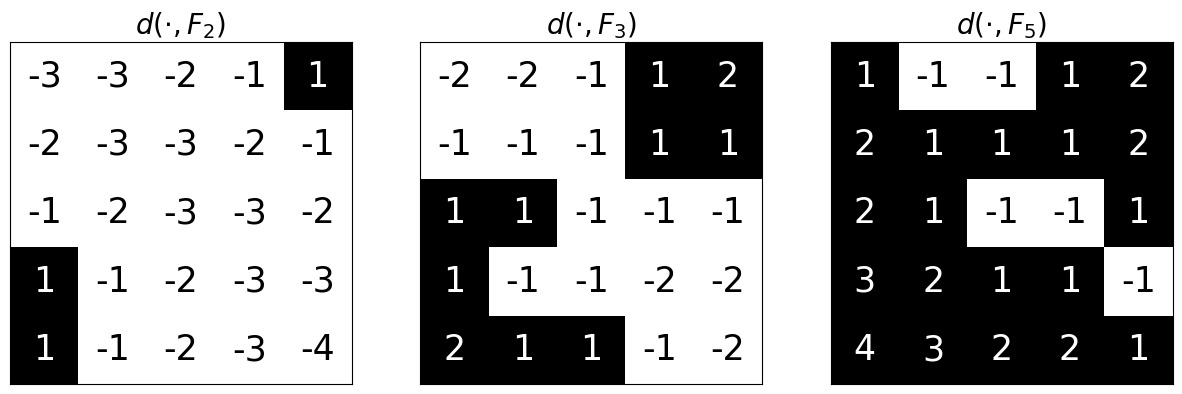

In [6]:
from utils import BinaryImage

fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 3, width_ratios=[2,2,2])

for i,t in enumerate([t1,t2,t3]):
    ax = fig.add_subplot(gs[i], aspect='equal')
    plt.setp(ax, xlim=(0,5), ylim=(0,5), xticks=[], yticks=[])
    im = BinaryImage(1*t)
    dist = im.distance_matrix(type="oriented", norm=cv.DIST_L1)
    ax.set_title(f"$d(\cdot,F_{list([2,3,5])[i]})$", fontsize=20)
    for x in range(5):
        for y in range(5):
            ax.add_patch(ptch.Rectangle([x,y],1,1, fc="white" if t[y,x] else "black"))
            ax.text(x+0.5, y+0.5, f"{dist[y,x]:.0f}", ha='center', va='center', fontsize=25, color="black" if t[y,x] else "white")


In [11]:
dist_transforms = []

for i in [2,3,4,5]:
    im = BinaryImage(example >= i)
    dist_transforms.append(im.distance_matrix(type="oriented", norm=cv.DIST_L1))
    
avg_dist = np.array(dist_transforms).mean(axis=0)
print(avg_dist)

[[ 2.75  1.5   0.75  0.   -1.  ]
 [ 2.    0.5  -0.25 -0.75 -1.75]
 [ 1.    0.25 -1.5  -1.5  -0.25]
 [ 0.25 -0.5  -0.5   0.25  1.  ]
 [-0.75 -1.75 -1.25  0.5   1.75]]


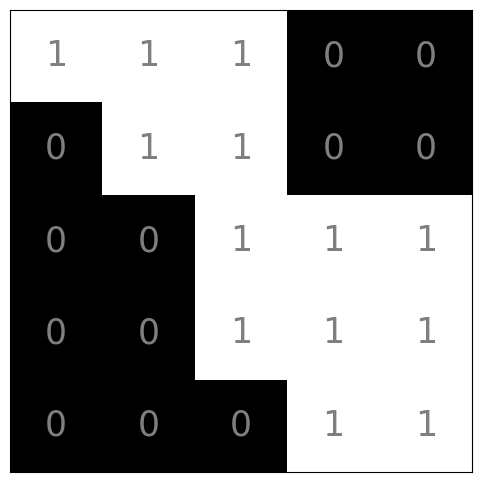

In [12]:
# vypocet ODA
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(1, 1)

ax = fig.add_subplot(gs[0], aspect='equal')
plt.setp(ax, xlim=(0,5), ylim=(0,5), xticks=[], yticks=[])
oda = avg_dist <=0
for x in range(5):
    for y in range(5):
        ax.add_patch(ptch.Rectangle([x,y],1,1, fc="white" if oda[y,x] else "black"))
        ax.text(x+0.5, y+0.5, 1*oda[y,x], ha='center', va='center', fontsize=25, color=(0,0,0,.5) if oda[y,x] else (1,1,1,.5))